# Περιγραφή

Διευκρινιστική Ανάλυση Δεδομένων [Explanatory Data Analysis (EDA)] με βάση το datetime των δημοσιεύσεων.

# Βιβλιοθήκες

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import datetime_plot

# Εισαγωγή

In [2]:
csv_path = '../Data/CSVs/removed_Info_merged_Text_df.csv'
df = pd.read_csv(csv_path, index_col=0)

df.head(3)

,DateTime,Text,Subject,Target
0,2016-08-18 20:55:25,Quebec to recieve 10 billion of 18 billion dol...,subject3178,0
1,2016-08-25 02:07:48,What are some lesser known tactics to get a be...,subject3178,0
2,2016-09-03 03:51:40,What are some old sayings that aren't very pop...,subject3178,0


In [3]:
# Drop the Text and Subject columns
df.drop(['Text'], axis=1, inplace=True)
df.drop(['Subject'], axis=1, inplace=True)

# Extract 2 new columns base on the Target
df['NotSafe'] = df['Target']
df['Safe']    = np.where(df['Target']==0, 1, 0)

# Drop the Target column
df.drop(['Target'], axis=1, inplace=True)

df.describe()

,NotSafe,Safe
count,170433.000000,170433.000000
mean,0.040644,0.959356
std,0.197464,0.197464
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [4]:
# Convert DateTime from string to datetime format and set as index
df['DateTime'] = pd.to_datetime(df.DateTime)

df.set_index('DateTime', inplace=True, drop=True)

df.head()

,NotSafe,Safe
DateTime,,
2016-08-18 20:55:25,0,1
2016-08-25 02:07:48,0,1
2016-09-03 03:51:40,0,1
2016-09-06 00:30:20,0,1
2016-10-03 21:46:54,0,1


# Χρονιές

In [5]:
df_year         = df
df_year['Year'] = df.index.year
df_year         = df_year.groupby('Year').sum()
df_year

,NotSafe,Safe
Year,,
2006,0,2
2007,0,1
2009,0,5
2010,0,139
2011,16,541
2012,14,1508
2013,66,3863
2014,141,6721
2015,352,9130


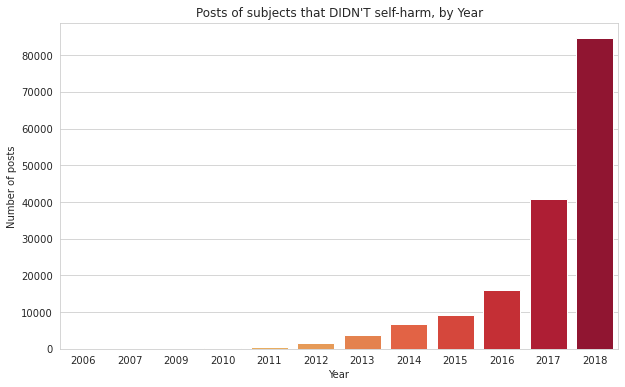

In [6]:
title   = "Posts of subjects that DIDN'T self-harm, by Year"
x       = df_year.index
y       = df_year['Safe']
palette = 'YlOrRd'

datetime_plot(title, x, y, palette)

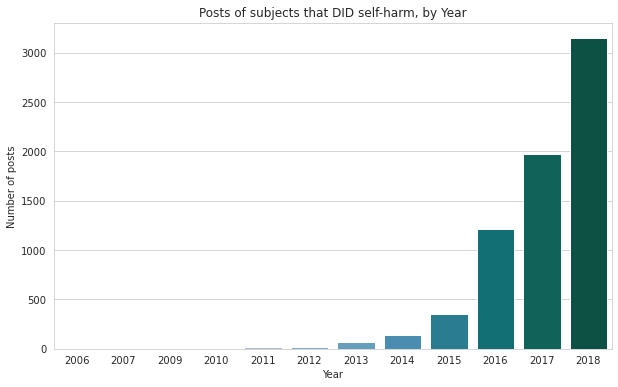

In [7]:
title   = "Posts of subjects that DID self-harm, by Year"
x       = df_year.index
y       = df_year['NotSafe']
palette = 'PuBuGn'

datetime_plot(title, x, y, palette)

# Εποχές

In [8]:
df_season = df

# Map months to seasons
seasons             = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
month_to_season     = dict(zip(range(1,13), seasons))
df_season['Season'] = df_season.index.month.map(month_to_season)

df_season = df_season.groupby('Season').sum()
df_season = df_season[['NotSafe','Safe']]

df_season

,NotSafe,Safe
Season,,
1,1387,34466
2,1891,41136
3,2379,63400
4,1270,24504


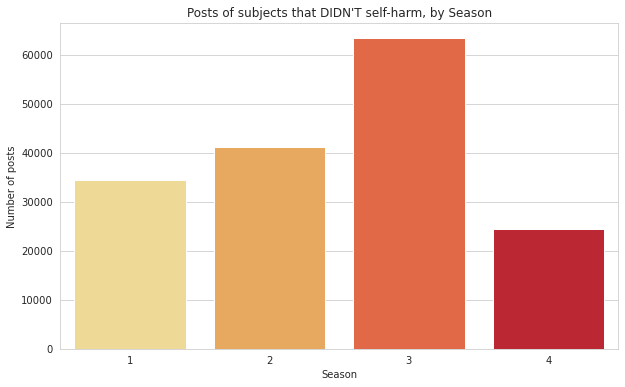

In [9]:
title   = "Posts of subjects that DIDN'T self-harm, by Season"
x       = df_season.index
y       = df_season['Safe']
palette = 'YlOrRd'

datetime_plot(title, x, y, palette)

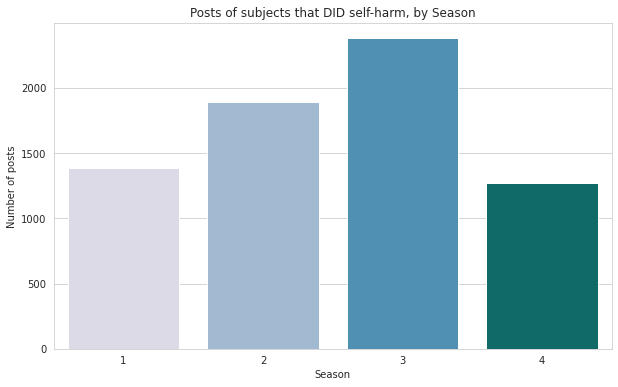

In [10]:
title   = "Posts of subjects that DID self-harm, by Season"
x       = df_season.index
y       = df_season['NotSafe']
palette = 'PuBuGn'

datetime_plot(title, x, y, palette)

# Μήνες

In [11]:
df_month          = df
df_month['Month'] = df.index.month
df_month          = df_month.groupby('Month').sum()
df_month          = df_month[['NotSafe', 'Safe']]
df_month

,NotSafe,Safe
Month,,
1,492,12658
2,434,11575
3,546,12984
4,611,13700
5,734,14452
6,712,18118
7,1149,20846
8,518,24436
9,350,8876


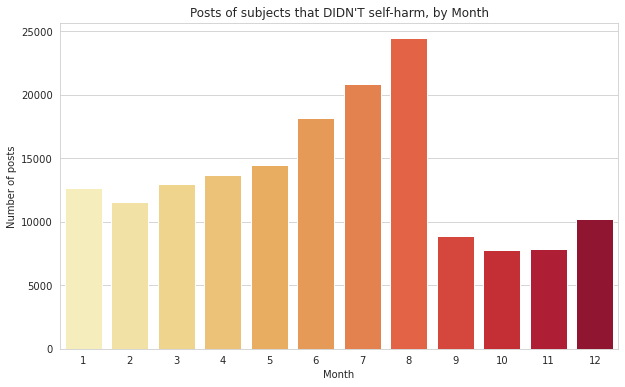

In [12]:
title   = "Posts of subjects that DIDN'T self-harm, by Month"
x       = df_month.index
y       = df_month['Safe']
palette = 'YlOrRd'

datetime_plot(title, x, y, palette)

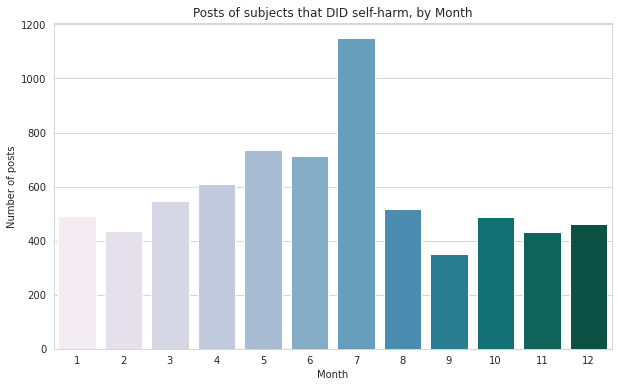

In [13]:
title   = "Posts of subjects that DID self-harm, by Month"
x       = df_month.index
y       = df_month['NotSafe']
palette = 'PuBuGn'

datetime_plot(title, x, y, palette)

# Mέρες

In [14]:
df_day        = df
df_day['Day'] = df.index.dayofweek
df_day        = df_day.groupby('Day').sum()
df_day        = df_day[['NotSafe','Safe']]
df_day

,NotSafe,Safe
Day,,
0,1082,24471
1,985,24426
2,998,24155
3,938,24094
4,992,23824
5,877,21130
6,1055,21406


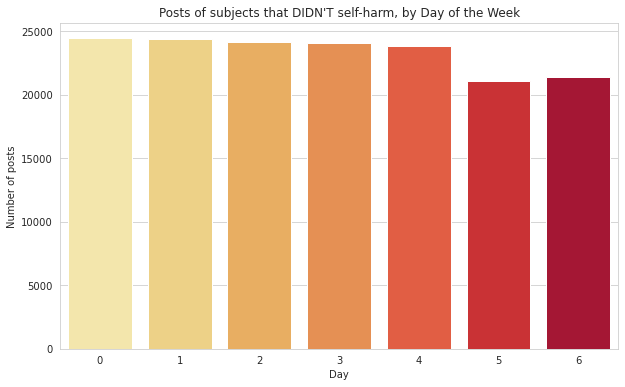

In [15]:
# Day 0 -> Monday
title   = "Posts of subjects that DIDN'T self-harm, by Day of the Week"
x       = df_day.index
y       = df_day['Safe']
palette = 'YlOrRd'

datetime_plot(title, x, y, palette)

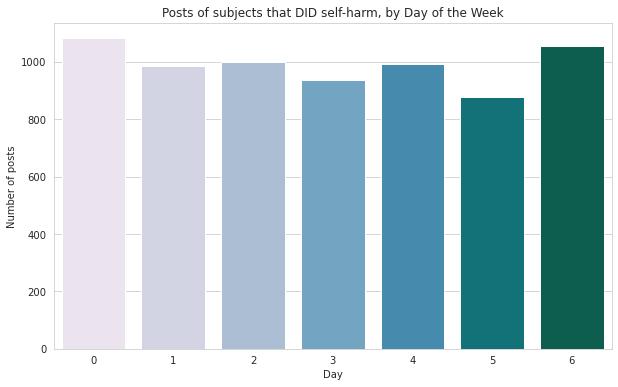

In [16]:
# Day 6 -> Sunday
title   = "Posts of subjects that DID self-harm, by Day of the Week"
x       = df_day.index
y       = df_day['NotSafe']
palette = 'PuBuGn'

datetime_plot(title, x, y, palette)

# Ώρες

In [17]:
df_hour         = df
df_hour['Hour'] = df.index.hour
df_hour         = df_hour.groupby('Hour').sum()
df_hour         = df_hour[['NotSafe','Safe']]
df_hour

,NotSafe,Safe
Hour,,
0,480,8252
1,406,7300
2,363,6871
3,425,6742
4,399,6661
5,329,5994
6,257,5133
7,255,4304
8,180,4175


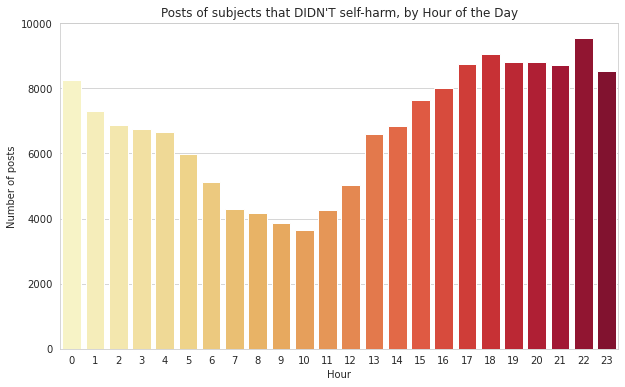

In [18]:
title   = "Posts of subjects that DIDN'T self-harm, by Hour of the Day"
x       = df_hour.index
y       = df_hour['Safe']
palette = 'YlOrRd'

datetime_plot(title, x, y, palette)

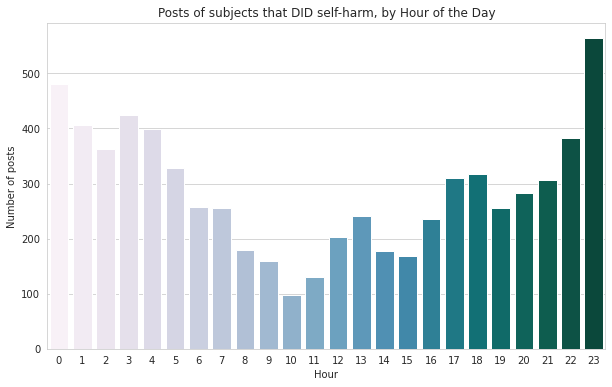

In [19]:
title   = "Posts of subjects that DID self-harm, by Hour of the Day"
x       = df_hour.index
y       = df_hour['NotSafe']
palette = 'PuBuGn'

datetime_plot(title, x, y, palette)

# Συμπέρασμα

Οπτικά η συσχέτιση εντοπίζεται κυρίως στις ώρες που δημοσιεύουν τα υποκείμενα από τις διαφορετικές κατηγορίες.